In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from imblearn. over_sampling import SMOTE

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv("income_evaluation.csv")

print("The shape of the raw data is",df.shape)

The shape of the raw data is (32561, 12)


In [3]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [4]:
df.shape

(32561, 12)

In [5]:
df.columns

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' hours-per-week',
       ' native-country', ' income'],
      dtype='object')

In [6]:
#Removing spaces infront of the column names
stripped_columns = []
for item in list(df.columns):
    item = item.strip()
    stripped_columns.append(item)
#Replacing column names with stripped_columns
df.columns = stripped_columns
#Checking new column names
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [7]:
#Using '_' to replace the column names
columns= list(df.columns)
adder = ""
new_columns =[]
for each_column in columns:
    for letter in each_column:
        if letter=="-":
            adder = adder + "_"
        else:
            adder = adder + letter
    new_columns.append(adder)
    adder=""
new_columns

['age',
 'workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hours_per_week',
 'native_country',
 'income']

In [8]:
#replacing old columns with new column names
df.columns=new_columns

In [9]:
#Determining dataframe columns characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours_per_week  32561 non-null  int64 
 10  native_country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [10]:
#Listing datatypes of the columns
df.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
income            object
dtype: object

In [11]:
#Descriptive Analytics of quantitative variables in the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [12]:
#calculating mode for categorical variables:
def mode(list_of_nums):
    average = list_of_nums.mode()
    return average

categorical_var = list(df.select_dtypes(include=object).columns)

#printing mode of categorical variables
for item in categorical_var:
    print(item + " mode: "+ mode(df[item]))

0    workclass mode:  Private
dtype: object
0    education mode:  HS-grad
dtype: object
0    marital_status mode:  Married-civ-spouse
dtype: object
0    occupation mode:  Prof-specialty
dtype: object
0    relationship mode:  Husband
dtype: object
0    race mode:  White
dtype: object
0    sex mode:  Male
dtype: object
0    native_country mode:  United-States
dtype: object
0    income mode:  <=50K
dtype: object


In [13]:
#Checking if any cells has missing values
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [14]:
#Determining different attributes for categorical variables
categorical_var = list(df.select_dtypes(include=object).columns)
for item in categorical_var:
    print(item + ":")
    print(df[item].unique())

workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race:
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex:
[' Male' ' Female']
native_country:
[' United-States' ' Cuba' ' Jamaica' ' 

In [15]:
#replacing '?' with Unknown:
df['workclass'].replace(' ?', ' Unknown',inplace=True)
df['occupation'].replace(' ?', ' Unknown',inplace=True)
df['native_country'].replace(' ?', ' Unknown',inplace=True)

In [16]:
#list of numberical and categorical variables
categorical_var = list(df.select_dtypes(include=object).columns)
numerical_var = list(df.select_dtypes(exclude=object).columns)

In [17]:
#importing matplotlib and seaborn packages
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, '\nWorkclass Types')

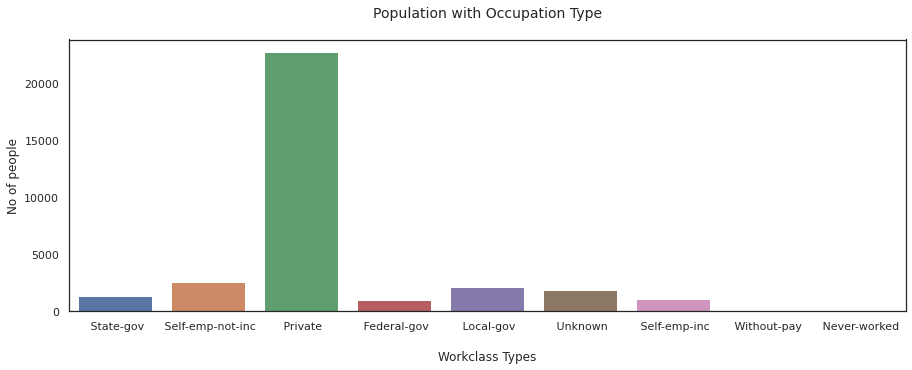

In [18]:
#Creating bargraph for workclass
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x="workclass", data=df)
plt.title("Population with Occupation Type\n",size =14)
plt.ylabel("No of people")
plt.xlabel("\nWorkclass Types")

Text(0.5, 0, '\n Education Level')

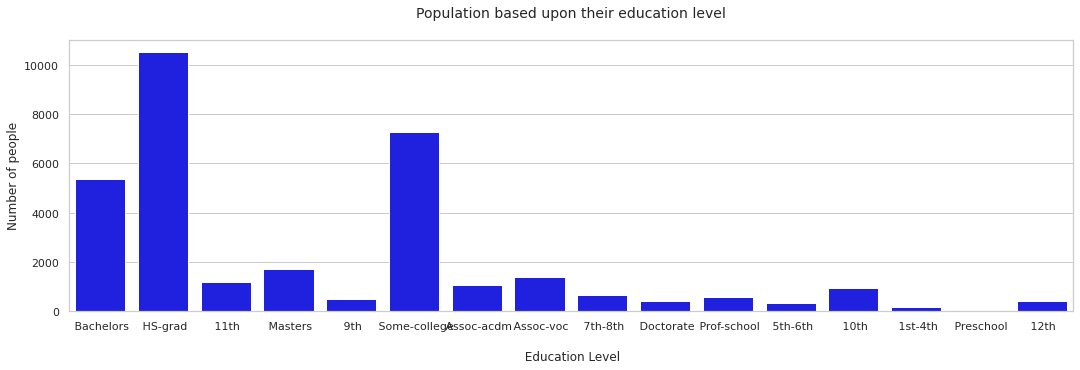

In [19]:
#Bargraph representing number of people with different education level
plt.figure(figsize=(18,5))
sns.set(style = 'whitegrid')
sns.countplot(x="education", data=df,color='blue')
plt.title("Population based upon their education level\n",size=14)
plt.ylabel("Number of people")
plt.xlabel("\n Education Level")

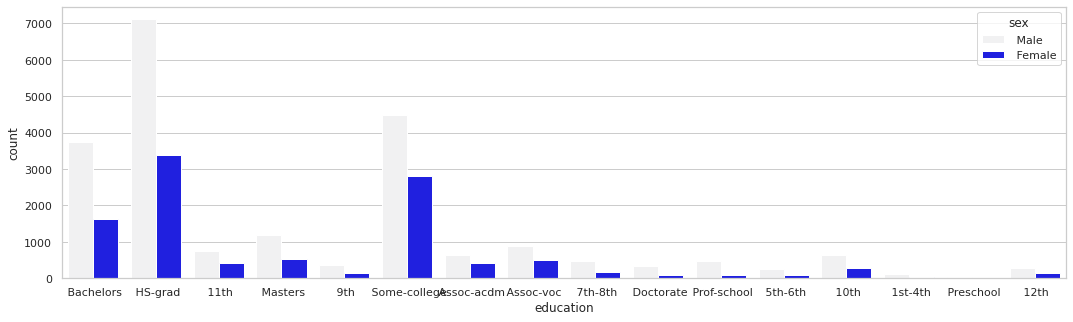

In [20]:
#Graph representing number of people based upon eduacation and sex
plt.figure(figsize=(18,5))
sns.countplot("education",data=df,hue="sex",color="blue")

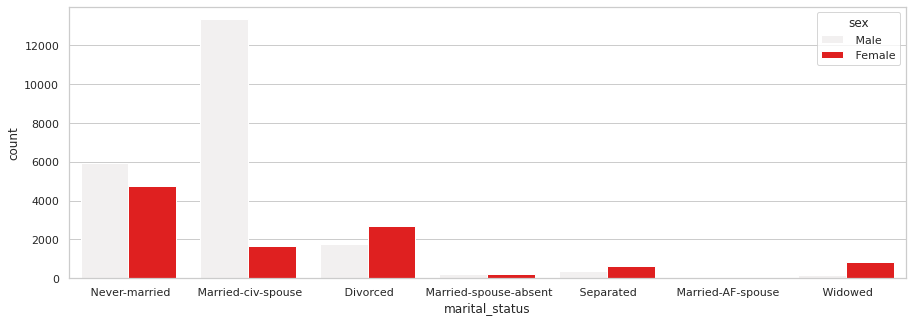

In [21]:
#Graph representing marital_status of people in the dataset:
plt.figure(figsize=(15,5))
sns.countplot("marital_status",data=df,hue="sex",color="red")

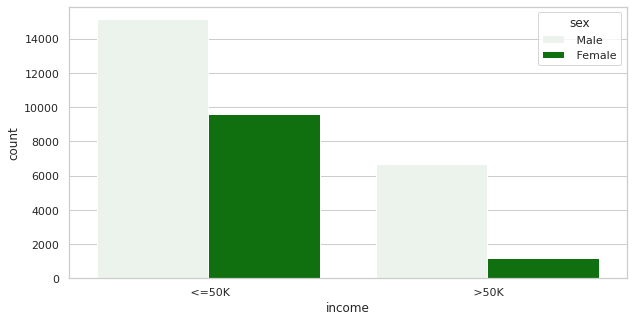

In [22]:
#Graph representing number of people based upon income:
plt.figure(figsize=(10,5))
sns.countplot("income",data=df,hue="sex",color="green")

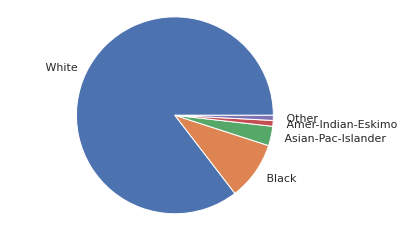

In [23]:
#Piechart showing representation of race in dataset
fig1, ax1 = plt.subplots()
X = list(df['race'].value_counts().index)
Y = list(df['race'].value_counts().values)
ax1.pie(Y,labels=X)
ax1.axis('equal') 
plt.show()

Text(0.5, 1.0, 'Age Histogram')

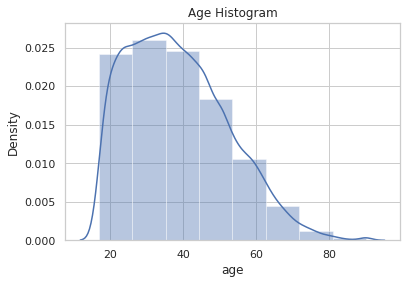

In [24]:
#Histogram representing age
sns.distplot(df['age'],bins=8)
plt.title("Age Histogram")

Text(0.5, 1.0, 'Box plot representing age and income \n')

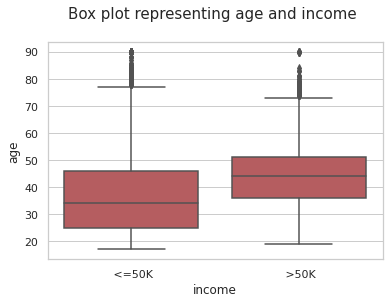

In [25]:
#Variation between age and income level
sns.boxplot(x=df['income'],y=df['age'],color='r')
plt.title("Box plot representing age and income \n", size = 15)

Text(0.5, 1.0, 'Box plot representing age and income \n')

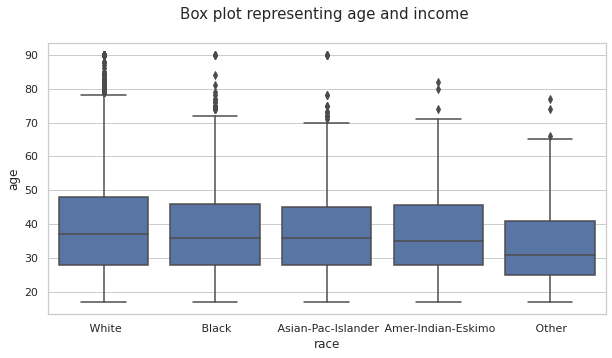

In [26]:
#Variation between race and age
plt.figure(figsize=(10,5))
sns.boxplot(x=df['race'],y=df['age'],color='b')
plt.title("Box plot representing age and income \n", size = 15)

Text(0.5, 1.0, 'Box plot representing age and income \n')

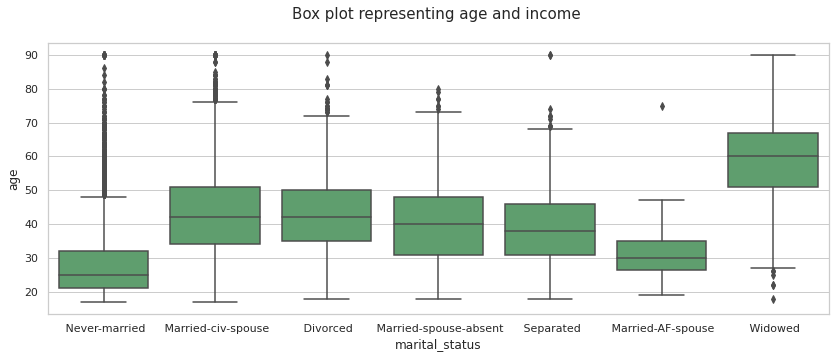

In [27]:
#Variation between marital status and age
plt.figure(figsize=(14,5))
sns.boxplot(x=df['marital_status'],y=df['age'],color='g')
plt.title("Box plot representing age and income \n", size = 15)

Text(0.5, 1.0, 'Relationship between hours worked and age')

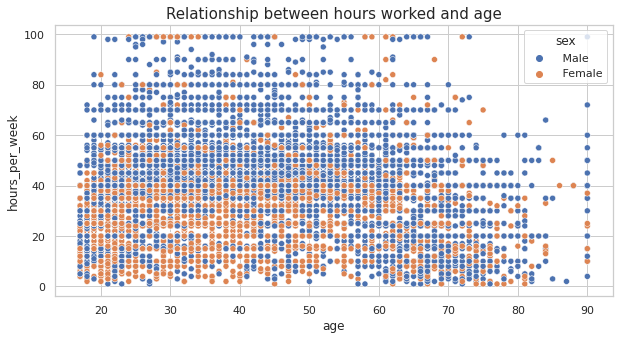

In [28]:
#Scatterplot representing relationship between age and hours-per-week
plt.figure(figsize=(10,5))
sns.scatterplot(x="age",y="hours_per_week",hue="sex",data=df)
plt.title('Relationship between hours worked and age',size=15)

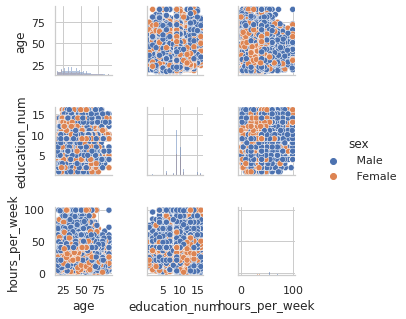

In [30]:
#pairplot to determine relationship between all the quantitative variables
sns.pairplot(df,height =1.5, hue="sex", diag_kind="hist")

In [31]:
#Dropping Numerical Variables with Zero Variance
df.std()

age               13.640433
education_num      2.572720
hours_per_week    12.347429
dtype: float64

In [32]:
#Dropping Categorical Variables with zero variation
categorical_var = list(df.select_dtypes(include=object).columns)
zero_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)==1:
        zero_cardinality.append(column)
zero_cardinality

[]

In [33]:
#Dropping Categorical Variables with Multiple Levels:
high_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)>100:
        high_cardinality.append(column)
high_cardinality

[]

In [34]:
#Dropping relationship column
df=df.drop('relationship',axis=1)

In [35]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,race,sex,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K


In [36]:
#Standarizing numerical variables
numerical_var = list(df.select_dtypes(exclude=object).columns)
array = df[numerical_var].values
scaler = StandardScaler().fit(array)
df[numerical_var] = pd.DataFrame(scaler.transform(array))

In [37]:
#checking in our numerical variables are not standarized
df[numerical_var].head()

,age,education_num,hours_per_week
0,0.030671,1.134739,-0.035429
1,0.837109,1.134739,-2.222153
2,-0.042642,-0.420060,-0.035429
3,1.057047,-1.197459,-0.035429
4,-0.775768,1.134739,-0.035429


In [38]:
#Checking if any column in our dataset has missing values
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [39]:
#Selecting all categorical variables except for dependent variable
categorical_var = list(set(df.dtypes[df.dtypes==object].index) - set(['income']))

#Creating dummy variables adn assigning dummy variabels to their original columns
dummy_cat_df = pd.get_dummies(df[categorical_var],drop_first=True)
df=df.drop(categorical_var,axis=1)
df=pd.concat([df,dummy_cat_df],axis = 1)

In [40]:
#Binarizing (encoding) dependent variable 'income'
dummy_cat_df1 = pd.get_dummies(df['income'],drop_first=True)
df=df.drop('income',axis=1)
df=pd.concat([df,dummy_cat_df1],axis = 1)

In [41]:
df.head()

,age,education_num,hours_per_week,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ Unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,...,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Unknown,native_country_ Vietnam,native_country_ Yugoslavia,>50K
0,0.030671,1.134739,-0.035429,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.837109,1.134739,-2.222153,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.042642,-0.420060,-0.035429,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.057047,-1.197459,-0.035429,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.775768,1.134739,-0.035429,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
df[' >50K'].value_counts()

0    24720
1     7841
Name:  >50K, dtype: int64

In [44]:
#balancing dependent variable
from imblearn. over_sampling import SMOTE
os= SMOTE(random_state=0)
input_var = list(set(df.columns)-set([' >50K']))



X,Y = os.fit_sample(df[input_var],df[' >50K'])


X=pd.DataFrame(X,columns=input_var)
Y = pd.DataFrame(Y,columns = [' >50K'])



df = pd.concat([X,Y],axis = 1)

In [45]:
df[' >50K'].value_counts()

1    24720
0    24720
Name:  >50K, dtype: int64

In [46]:
#renaming dependent variable to income
df.rename(columns={' >50K':'income'},inplace=True)

In [47]:
input_var  = set(df.columns) - set(['income'])
X = df[input_var]
Y = df['income']

models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN','Support Vector Machine','Neural Networks']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [48]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [49]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
#Support Vector Machines
SVM = svm.LinearSVC()
SVM.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [53]:
#Neural Networks
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [54]:
# computes the confusion matrix and performence indicators
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [55]:
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

pred_Y_svm = SVM.predict(X_test) # predicts the Y given the fitted model Support Vector Machines

pred_Y_nn = NN.predict(X_test) # predicts the Y given the fitted model Neural Networks

In [56]:
# accuracy, sensitivity, and specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(Y_test, pred_Y_lr)


# accuracy, sensitivity, and specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performances(Y_test, pred_Y_dt)


# accuracy, sensitivity, and specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(Y_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(Y_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(Y_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Neural Networks
accuracy_nn, sensitivity_nn, specificity_nn = get_performances(Y_test, pred_Y_nn)

In [57]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_nn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN','Support Vector Machine','Neural Networks'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_nn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn,specificity_svm,specificity_nn])
perf

,accuracy,sensitivity,specificity
Logistic Regression,0.812331,0.772711,0.851730
Decision Trees,0.846163,0.802827,0.889256
Random Forest,0.813802,0.723294,0.903801
K-NN,0.830963,0.762754,0.898790
Support Vector Machine,0.809083,0.761033,0.856863
Neural Networks,0.825141,0.777873,0.872143


In [58]:
from sklearn.metrics import roc_curve, auc

In [59]:
score_Y_nn = NN.predict_proba(X_test)
score_Y_nn 

array([[9.98430315e-01, 1.56968519e-03],
       [9.22191045e-01, 7.78089546e-02],
       [3.10878663e-01, 6.89121337e-01],
       ...,
       [9.99580283e-01, 4.19716635e-04],
       [9.32872463e-02, 9.06712754e-01],
       [1.98840579e-02, 9.80115942e-01]])

In [60]:
score_Y_nn = NN.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_nn[:,1])
roc_auc = auc(fpr, tpr)

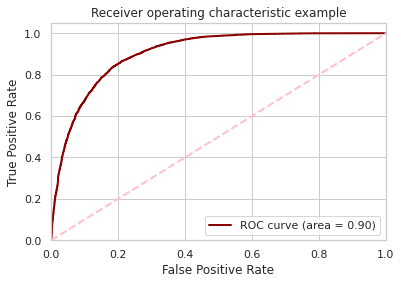

In [61]:
score_Y_nn = NN.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_nn[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkred',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [62]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [63]:
ft_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

ft_scores

age                                           2.613022e-01
marital_status_ Married-civ-spouse            1.730658e-01
hours_per_week                                1.242452e-01
marital_status_ Never-married                 6.918780e-02
education_num                                 5.521863e-02
                                                  ...     
occupation_ Armed-Forces                      1.974629e-05
native_country_ Outlying-US(Guam-USVI-etc)    1.282637e-05
native_country_ Honduras                      5.633043e-06
workclass_ Never-worked                       2.808859e-06
native_country_ Holand-Netherlands            9.985324e-09
Length: 92, dtype: float64

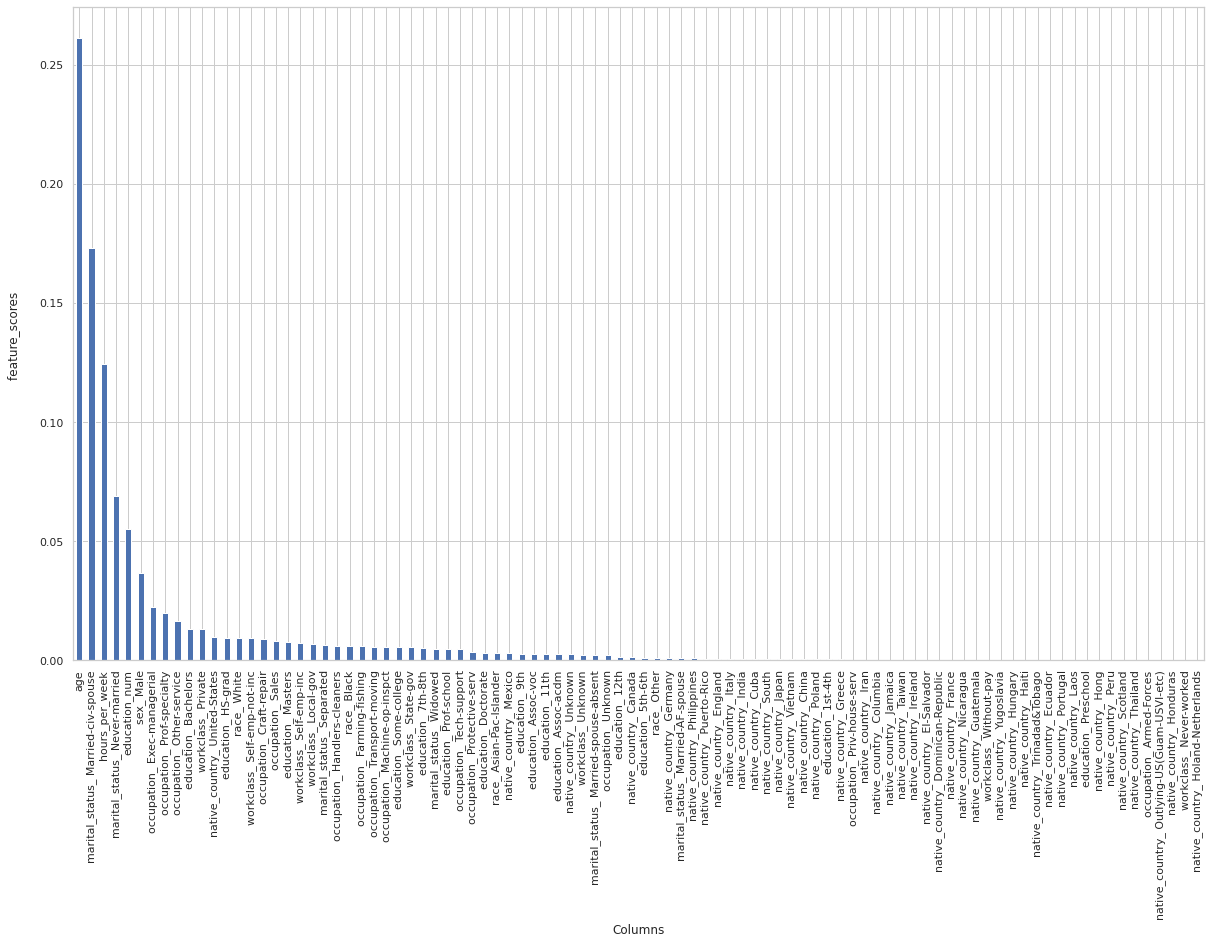

In [64]:
#plotting ft_scores to visualize significance of individual column
plt.figure(figsize = (17,10))
plt.xlabel('Columns')
plt.ylabel('feature_scores \n')
plt.tight_layout()

ft_scores.plot.bar()